In [1]:
import requests
from lxml import html
from extract import Match, Goal
import itertools
from pages.match.match_detail_page import MatchDetailPage
from decimal import Decimal
from collections import defaultdict

In [17]:
def sort_by_minute(goal: Goal):
    """Sort goals by minutes. Handle stoppage time."""
    x = goal.minute
    if "+" in x:
        x, y = x.split("+")
        return Decimal(".".join([x, y]))
    else:
        return int(x)

match_ids = [
    "75181",
    "75174",
    "75161",
    "74971",
    "75156",
    "75141",
    "75021",
    "75131",
    "75125",
    "75111",
    "75109",
    "75091",
    "75082",
    "75071",
    "75070",
    "75052",
    "75041",
    "75037",
    "75014",
    "75001",
    "74991",
    "74982",
    "74966",
    "74951",
    "74941",
    "74931",
    "74921",
    "74911",
]

arsenal_matches = []
match_url = "https://www.premierleague.com/match/"
for match_id in match_ids:
    # Make the request to the URL
    response = requests.get(f"{match_url}{match_id}")
    doc = html.fromstring(response.content)
    match_page = MatchDetailPage(doc=doc)
    match: Match = match_page.extract()
    arsenal_matches.append(match)

home_matches = []
away_matches = []
for match in arsenal_matches:
    if match.home.short == "ARS":
        home_matches.append(match)
    elif match.away.short == "ARS":
        away_matches.append(match)

home_goals = []
for match in home_matches:
    home_goals.extend(match.home_events)
away_goals = []
for match in away_matches:
    away_goals.extend(match.away_events)
sorted_home_goals = sorted(home_goals, key=sort_by_minute)
sorted_away_goals = sorted(away_goals, key=sort_by_minute)

('Not goal: ', "Emerson Royal 62' Red Card")


In [18]:
home_goals_dict = defaultdict(list)
for minute, group in itertools.groupby(sorted_home_goals, key=lambda goal: goal.minute):
    home_goals_dict[minute]=list(group)

<BarContainer object of 35 artists>

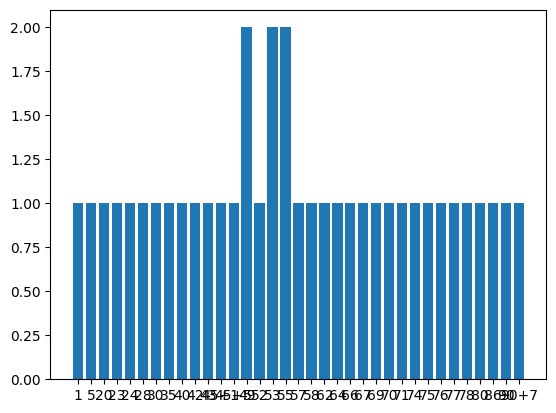

In [19]:
keys = home_goals_dict.keys()
vals = [len(val) for val in home_goals_dict.values()]
import matplotlib.pyplot as plt
plt.bar(keys, vals)


In [12]:
for value in home_goals_dict.values():
    print(len(value))

1
1
1
1
1
1
1
2
1
1
1
1
1
1
1


In [20]:
home_goals_dict

defaultdict(list,
            {'1': [Goal(match='75001', minute='1', scorer='Gabriel Martinelli ', assist='')],
             '5': [Goal(match='75041', minute='5', scorer='Gabriel Martinelli ', assist='')],
             '20': [Goal(match='74991', minute='20', scorer='Thomas Partey ', assist='')],
             '23': [Goal(match='74921', minute='23', scorer='Gabriel Jesus ', assist='')],
             '24': [Goal(match='75111', minute='24', scorer='Eddie Nketiah ', assist='')],
             '28': [Goal(match='75181', minute='28', scorer='Gabriel Martinelli ', assist='')],
             '30': [Goal(match='74951', minute='30', scorer='Gabriel Jesus ', assist='')],
             '35': [Goal(match='74921', minute='35', scorer='Gabriel Jesus ', assist='')],
             '40': [Goal(match='74971', minute='40', scorer='Bukayo Saka ', assist='')],
             '42': [Goal(match='75021', minute='42', scorer='Bukayo Saka ', assist='')],
             '43': [Goal(match='75181', minute='43', scorer='Buka

In [30]:
first_15_mins = (1, 16)
last_15_mins = (75, 91)

df = defaultdict(int)

for minute, goal in home_goals_dict.items():
    if "+" in minute:
        x, y = minute.split("+")
        minute = Decimal(".".join([x, y]))
    else:
        minute = int(minute)
    if minute > first_15_mins[0] and minute < first_15_mins[1]:
        df["first_15_mins"] += len(goal)
    elif minute > last_15_mins[0] and minute < last_15_mins[1]:
        df["last_15_mins"] += len(goal)
    else:
        df["remaining"] += len(goal)
df

defaultdict(int, {'remaining': 30, 'first_15_mins': 1, 'last_15_mins': 7})

<BarContainer object of 3 artists>

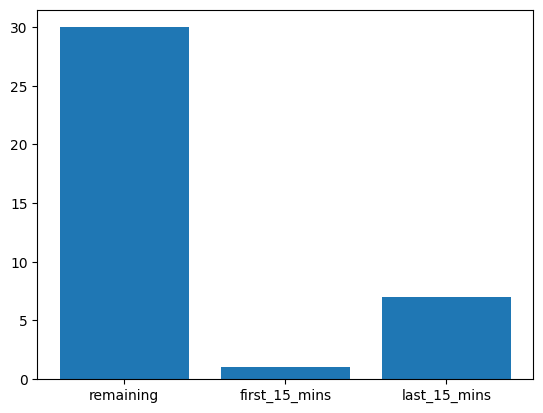

In [31]:
plt.bar(df.keys(), df.values())

[[Goal(match='75001', minute='76', scorer='Bukayo Saka ', assist='')],
 [Goal(match='74951', minute='77', scorer='Gabriel Martinelli ', assist='')],
 [Goal(match='75041', minute='78', scorer='Martin ', assist='')],
 [Goal(match='74971', minute='80', scorer='Gabriel Martinelli ', assist='')],
 [Goal(match='74941', minute='86', scorer='Gabriel Magalh', assist='')],
 [Goal(match='75111', minute='90', scorer='Eddie Nketiah ', assist='')],
 [Goal(match='75161', minute='90+7', scorer='Reiss Nelson ', assist='')]]

<BarContainer object of 3 artists>

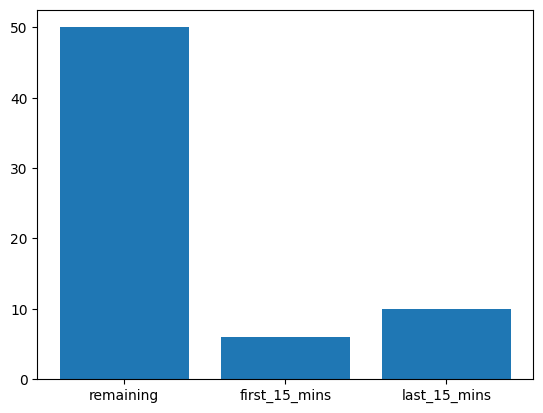

In [34]:
total_goals = home_goals + away_goals
sorted_total_goals = sorted(total_goals, key=sort_by_minute)
total_goals_dict = defaultdict(list)
for minute, group in itertools.groupby(sorted_total_goals, key=lambda goal: goal.minute):
    total_goals_dict[minute]=list(group)

first_15_mins = (1, 16)
last_15_mins = (75, 91)

df = defaultdict(int)

for minute, goal in total_goals_dict.items():
    if "+" in minute:
        x, y = minute.split("+")
        minute = Decimal(".".join([x, y]))
    else:
        minute = int(minute)
    if minute > first_15_mins[0] and minute < first_15_mins[1]:
        df["first_15_mins"] += len(goal)
    elif minute > last_15_mins[0] and minute < last_15_mins[1]:
        df["last_15_mins"] += len(goal)
    else:
        df["remaining"] += len(goal)

import matplotlib.pyplot as plt
plt.bar(df.keys(), df.values())